In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as stats 
from IPython.core.display import HTML
#css = open('style-table.css').read() + open('style-notebook.css').read()
#HTML('<style>{}</style>'.format(css))
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('paysim.csv')

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [6]:
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [7]:
df.groupby(['type'])['isFraud'].sum()


type
CASH_IN        0
CASH_OUT    4116
DEBIT          0
PAYMENT        0
TRANSFER    4097
Name: isFraud, dtype: int64

In [8]:
df.groupby(['type'])['isFlaggedFraud'].sum()


type
CASH_IN      0
CASH_OUT     0
DEBIT        0
PAYMENT      0
TRANSFER    16
Name: isFlaggedFraud, dtype: int64

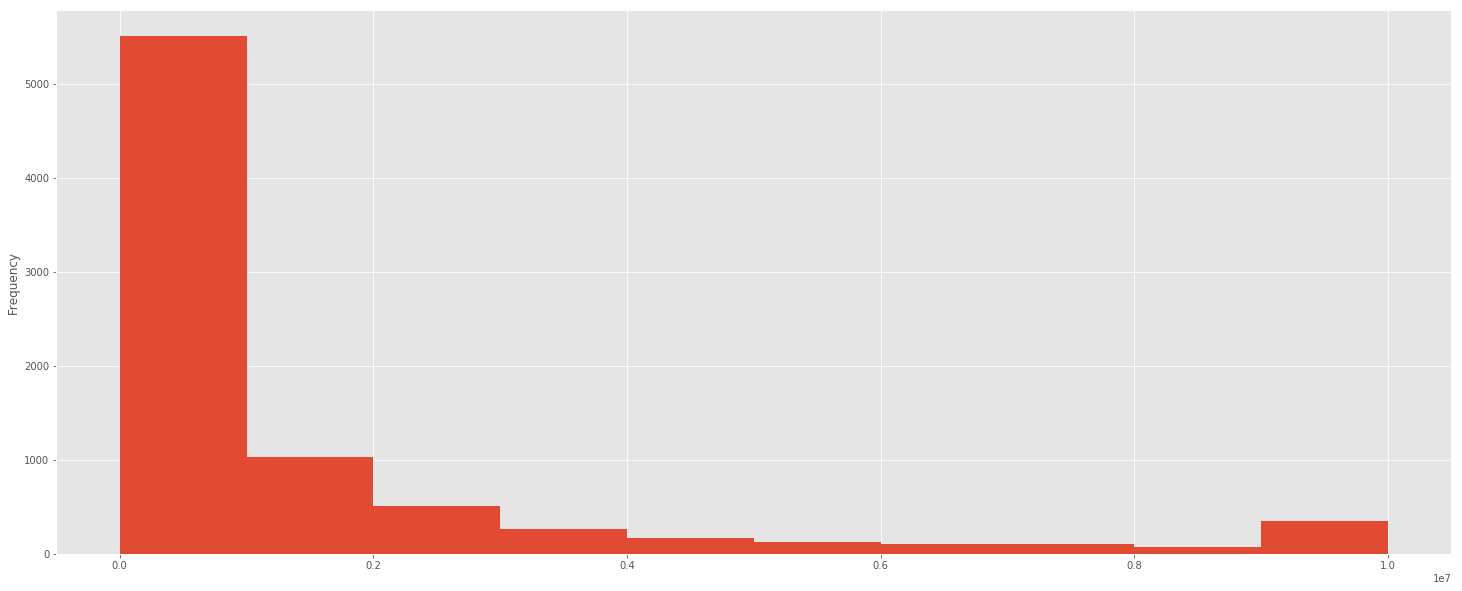

In [9]:
plt.figure(figsize=(25 , 10))

df[df['isFraud'] == 1]['amount'].plot(kind = 'hist')

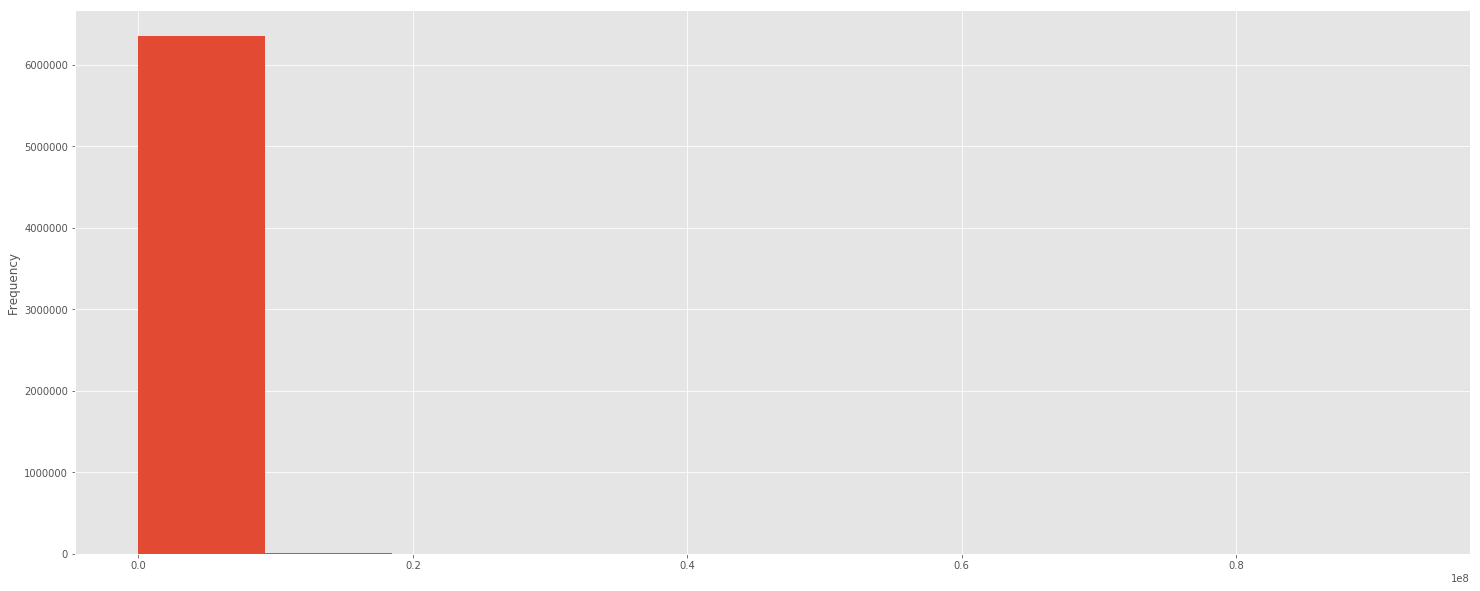

In [10]:
plt.figure(figsize=(25 , 10))

df[df['isFraud'] == 0]['amount'].plot(kind = 'hist')

In [11]:
df.loc[df['isFraud'] == 0,['type' , 'amount']].groupby('type').mean()

,amount
type,
CASH_IN,168920.242004
CASH_OUT,173917.155751
DEBIT,5483.665314
PAYMENT,13057.604660
TRANSFER,906229.007812


In [12]:
df.loc[df['isFraud'] == 1,['type' , 'amount']].groupby('type').mean()

,amount
type,
CASH_OUT,1.455103e+06
TRANSFER,1.480892e+06


In [13]:
df[['type' , 'amount' , 'isFraud']].groupby(['type' ,'isFraud']).mean()

amount
type     isFraud              
CASH_IN  0        1.689202e+05
CASH_OUT 0        1.739172e+05
         1        1.455103e+06
DEBIT    0        5.483665e+03
PAYMENT  0        1.305760e+04
TRANSFER 0        9.062290e+05
         1        1.480892e+06

In [14]:
pd.pivot_table(df , index= ['isFraud' , 'type'] ,values= 'amount' , aggfunc= 'mean')

amount
isFraud type                  
0       CASH_IN   1.689202e+05
        CASH_OUT  1.739172e+05
        DEBIT     5.483665e+03
        PAYMENT   1.305760e+04
        TRANSFER  9.062290e+05
1       CASH_OUT  1.455103e+06
        TRANSFER  1.480892e+06

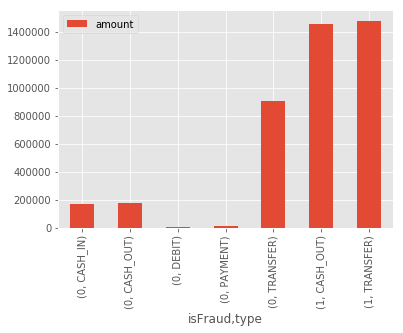

In [15]:
pd.pivot_table(df , index= ['isFraud' , 'type'] ,values= 'amount' , aggfunc= 'mean').plot(kind = 'bar')

## Infrential Statistics


H0 : P(isFraud == 1) = P(isFraud == 0)

Ha : P(isFraud == 1) ≠ P(isFraud == 0)

In [16]:
import scipy.stats as stats

In [17]:
observe_tbl = pd.crosstab(df['type'] , df['isFraud'])

In [18]:
observe_tbl

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [19]:
stats.chi2_contingency(observe_tbl)

(22082.53571319108, 0.0, 4, array([[1.39747778e+06, 1.80622440e+03],
        [2.23461179e+06, 2.88821075e+03],
        [4.13785187e+04, 5.34812728e+01],
        [2.14871781e+06, 2.77719374e+03],
        [5.32221110e+05, 6.87889834e+02]]))

##### P-Value of 0.0 indicates that there are statistically sigificant difference between the type of the transactions and the probability of transaction being fraudulent

H0 : P(isFlaggedFraud == 1) = P(isFlaggedFraud == 0)

Ha : P(isFlaggedFraud == 1) ≠ P(isFlaggedFraud == 0)

In [20]:
observe_tbl2 = pd.crosstab(df['type'] , df['isFlaggedFraud'])

In [21]:
observe_tbl2

isFlaggedFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2237500,0
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,532893,16


In [22]:
stats.chi2_contingency(observe_tbl2)

(175.0310288604575,
 8.699902785322113e-37,
 4,
 array([[1.39928048e+06, 3.51876177e+00],
        [2.23749437e+06, 5.62661294e+00],
        [4.14318958e+04, 1.04188526e-01],
        [2.15148959e+06, 5.41033725e+00],
        [5.32907660e+05, 1.34009952e+00]]))

##### P-Value of 8.699902785322113e-37 indicates that there are statistically sigificant difference between the type of the transactions and the probability of transaction being flagged as fraud

## Machine Learning 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score , confusion_matrix , precision_score , precision_recall_curve , f1_score
from sklearn.metrics import classification_report , roc_auc_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier



In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [26]:
df['type'] = df['type'].astype('category')

df = pd.get_dummies(df , columns= ['type'])

In [27]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


In [28]:
df.shape

(6362620, 15)

#### Build Train and Test Datasets

In [29]:
Taining_set= df[:300000]
Test_set = df[300000:]

In [30]:
X = Taining_set.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1 ).values

y = Taining_set['isFraud'].values


**In dealing with imabalnced data sets accuracy can be a misleading metric.** Many machine learning algorithms are designed to maximize overall accuracy by default and in imbalanced datasets it can be achieved by completely ignoring the minority class in favor of majority class.

The better way to evaluating our models is to check the false classifications such as False Negatives or False Positives. Precision and Recall scores along with Confusion Matrix are proper metrics to evaluate performance of our models.

In this specific problem the cost of missing a fraudulent transasction and miss classifying it is very high. Therefore the focus of our model optimization should be to reduce the number of False Negatives as much as poossible. 

**Recall** is the metric that measures **False Negatives.** **Our goal should be to increase the Recall score.** 

In [31]:
lr = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

print (accuracy_score(y_test , lr_predict))

print (confusion_matrix(y_test , lr_predict))

C:\Users\19145\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9994888888888889
[[89941     6]
 [   40    13]]


In [32]:
param_grid = {'C' : [0.001,0.01,0.1,1,10,100]}

grid_lr = GridSearchCV(lr , param_grid , cv = 3)

grid_lr.fit(X_train , y_train)

grid_lr.best_params_

C:\Users\19145\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19145\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19145\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\19145\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\19145\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteratio

{'C': 100}

In [33]:
lr = LogisticRegression(C = 0.1)

lr.fit(X_train, y_train)

lr_predict = lr.predict(X_test)

print (accuracy_score(y_test , lr_predict))

print (confusion_matrix(y_test , lr_predict))

C:\Users\19145\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9994666666666666
[[89939     8]
 [   40    13]]


In [34]:
rfc = RandomForestClassifier()

rfc.fit(X_train , y_train)

rfc_predict = rfc.predict(X_test)

print (accuracy_score(y_test , rfc_predict))

print (confusion_matrix(y_test , rfc_predict))

C:\Users\19145\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9996222222222222
[[89945     2]
 [   32    21]]


In [35]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [36]:
%%time

random_rfc = RandomizedSearchCV(rfc , param_grid , cv = 3)

random_rfc.fit(X_train , y_train)

random_rfc.best_params_

Wall time: 44min


In [37]:
random_rfc.best_params_

{'n_estimators': 523,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [38]:
%%time

rfc = RandomForestClassifier(n_estimators= 474, min_samples_split = 2, min_samples_leaf = 2,
                             max_features= 'sqrt', max_depth= None, bootstrap= False)
 

rfc.fit(X_train , y_train)

rfc_predict = rfc.predict(X_test)

print (accuracy_score(y_test , rfc_predict))

print (confusion_matrix(y_test , rfc_predict))

print("F1 score: ", f1_score(y_test , rfc_predict))

print("Precision score: " , precision_score(y_test , rfc_predict))

print("Recall score: " , recall_score(y_test , rfc_predict))

0.9996555555555555
[[89943     4]
 [   27    26]]
F1 score:  0.6265060240963856
Precision score:  0.8666666666666667
Recall score:  0.49056603773584906
Wall time: 2min 23s


In [4]:
%%time 

nb = MultinomialNB()

nb.fit(X_train , y_train)

nb_predict = nb.predict(X_test)

print (accuracy_score(y_test , nb_predict))

print (confusion_matrix(y_test , nb_predict))


NameError: name 'MultinomialNB' is not defined

In [5]:
%%time

import scipy as sp

param_grid = {'alpha' : sp.stats.uniform(scale = 1)}

random_nb = RandomizedSearchCV(nb , param_grid , cv = 3 )

random_nb.fit(X_train , y_train)

NameError: name 'RandomizedSearchCV' is not defined

In [41]:
random_nb.best_params_

{'alpha': 0.4560137218959761}

In [3]:
%%time 

nb = MultinomialNB(alpha = 0.028014230045077304 )

nb.fit(X_train , y_train)

nb_predict = nb.predict(X_test)

print (accuracy_score(y_test , nb_predict))

print (confusion_matrix(y_test , nb_predict))

print("F1 score: ", f1_score(y_test , nb_predict))

print("Precision score: " , precision_score(y_test , nb_predict))

print("Recall score: " , recall_score(y_test , nb_predict))

NameError: name 'MultinomialNB' is not defined

In [2]:
%%time 

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import make_pipeline as make_pipeline_imb

smote_pipeline = make_pipeline_imb(SMOTE() , nb)

smote_pipeline.fit(X_train , y_train)

smote_predict = smote_pipeline.predict(X_test)

print (accuracy_score(y_test , smote_predict))

print (confusion_matrix(y_test , smote_predict))

print("F1 score: ", f1_score(y_test , smote_predict))

print("Precision score: " , precision_score(y_test , smote_predict))

print("Recall score: " , recall_score(y_test , smote_predict))

Using TensorFlow backend.
C:\Users\19145\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\19145\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\19145\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\19145\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

NameError: name 'nb' is not defined

In [51]:
%%time 

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import make_pipeline as make_pipeline_imb

#smote_pipeline = make_pipeline_imb(SMOTE(sampling_strategy = 0.95) , nb)
smote_pipeline = make_pipeline_imb(SMOTE() , nb)

smote_pipeline.fit(X_train , y_train)

smote_predict = smote_pipeline.predict(X_test)

print (accuracy_score(y_test , smote_predict))

print (confusion_matrix(y_test , smote_predict))

print("F1 score: ", f1_score(y_test , smote_predict))

print("Precision score: " , precision_score(y_test , smote_predict))

print("Recall score: " , recall_score(y_test , smote_predict))

AttributeError: 'Pipeline' object has no attribute '_iter'

In [45]:
%%time 

smote_pipeline_rfc = make_pipeline_imb(SMOTE(sampling_strategy = 0.95) , rfc)

smote_pipeline_rfc.fit(X_train , y_train)

smote_predict_rfc = smote_pipeline_rfc.predict(X_test)

print (accuracy_score(y_test , smote_predict_rfc))

print (confusion_matrix(y_test , smote_predict_rfc))

print("F1 score: ", f1_score(y_test , smote_predict_rfc))

print("Precision score: " , precision_score(y_test , smote_predict_rfc))

print("Recall score: " , recall_score(y_test , smote_predict_rfc))

AttributeError: 'Pipeline' object has no attribute '_iter'

In [46]:
%%time 

smote_pipeline_lr = make_pipeline_imb(SMOTE(sampling_strategy = 0.95) , lr)

smote_pipeline_lr.fit(X_train , y_train)

smote_predict_lr = smote_pipeline_lr.predict(X_test)

print (accuracy_score(y_test , smote_predict_lr))

print (confusion_matrix(y_test , smote_predict_lr))

print("F1 score: ", f1_score(y_test , smote_predict_lr))

print("Precision score: " , precision_score(y_test , smote_predict_lr))

print("Recall score: " , recall_score(y_test , smote_predict_lr))

AttributeError: 'Pipeline' object has no attribute '_iter'

### Stacking top two best models to get create the ultimate predictor

In [47]:
%%time

from sklearn.ensemble import VotingClassifier

elixir = VotingClassifier(estimators= [('smote_lr' , smote_pipeline_lr) , ('smote_nb' , smote_pipeline)] , 
                         voting= 'hard' , weights= [10 , 2])

Wall time: 0 ns


In [48]:
elixir.fit(X_train , y_train)

elixir_predict = elixir.predict(X_test)

print (accuracy_score(y_test , elixir_predict))

print (confusion_matrix(y_test , elixir_predict))

print("F1 score: ", f1_score(y_test , elixir_predict))

print("Precision score: " , precision_score(y_test , elixir_predict))

print("Recall score: " , recall_score(y_test , elixir_predict))

AttributeError: 'Pipeline' object has no attribute '_iter'

In [ ]:
from sklearn.metrics import roc_curve

lr_fp, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_predict)
nb_fp, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_predict)
rf_fp, rf_tpr, rf_thresholds  = roc_curve(y_test, rfc_predict)
nb_smote_fp, nb_smote_tpr, nb_smote_thresholds = roc_curve(y_test, smote_predict)
rfc_smote_fp, rfc_smote_tpr, rfc_smote_thresholds = roc_curve(y_test, smote_predict_rfc)
lr_smote_fp, lr_smote_tpr, lr_smote_thresholds = roc_curve(y_test, smote_predict_lr)
el_fp, el_tpr, el_thresholds  = roc_curve(y_test, elixir_predict)


plt.figure(figsize= (16 , 12))
plt.plot([0,1], [0,1], 'k--' , )
plt.plot(lr_fp, lr_tpr, label='Logistic Regression')
plt.plot(nb_fp, nb_tpr, label='Naive Bayes')
plt.plot(rf_fp, rf_tpr, label='Random Forest')
plt.plot(lr_smote_fp, lr_smote_tpr, label='SMOTE + lr')
plt.plot(nb_smote_fp, nb_smote_tpr, label='SMOTE + Naïve Bayes')
plt.plot(rfc_smote_fp, rfc_smote_tpr, label='SMOTE + Random Forest')
plt.plot(el_fp, el_tpr, label='SMOTE Logistic Regression + SMOTE Naïve Bayes')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
lr_recall = recall_score(y_test, lr_predict) 
nb_recall = recall_score(y_test, nb_predict)
rfc_recall = recall_score(y_test, rfc_predict)
smote_nb_recall = recall_score(y_test, smote_predict)
smote_rfc_recall = recall_score(y_test, smote_predict_rfc)
smote_lr_recall = recall_score(y_test, smote_predict_lr)
elixir_recall = recall_score(y_test, elixir_predict)

In [ ]:
import cufflinks as cf
import plotly
plotly.tools.set_credentials_file(username='nehrmegar', api_key='Ssb3HL4agEFKnGpftCV8')
import plotly.graph_objs as go
import plotly.plotly as py

data = [go.Line(
            x=['Logistic Regression', 'Naive Bayes', 'Random Forest' , 
                'SMOTE_NB', 'SMOTE_Random Forest ','SMOTE_Logistic Regression', 'SMOTE Logistic Regression + SMOTE Naïve Bayes'],
            y=[lr_recall, nb_recall, rfc_recall , smote_nb_recall , smote_rfc_recall , smote_lr_recall , 
              elixir_recall]
    )]
layout = go.Layout(
    title = "Comparing Recall Values",
    font=dict(family='Courier New, monospace', size=11), 
    autosize=False,
    width=900,
    height=450)
fig = go.Figure(data=data,layout=layout )
py.iplot(fig , filename='basic-bar')

In [ ]:
from IPython.display import Image
Image(filename="Comparing Recall Values.png")

## Evaluating the models performance on hold out model: 

In [ ]:
Taining_set= df[:300000]
Test_set = df[300000:]

In [ ]:
X_Taining_set = Taining_set.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1 ).values

y_Taining_set = Taining_set['isFraud'].values

X_Test_set = Test_set.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1).values

y_Test_set = Test_set['isFraud'].values

In [ ]:
%%time

elixir.fit(X_Taining_set ,y_Taining_set)

elixir_predict_real = elixir.predict(X_Test_set)

print (accuracy_score(y_Test_set , elixir_predict_real))

print (confusion_matrix(y_Test_set , elixir_predict_real))

print("F1 score: ", f1_score(y_Test_set , elixir_predict_real))

print("Precision score: " , precision_score(y_Test_set , elixir_predict_real))

print("Recall score: " , recall_score(y_Test_set , elixir_predict_real))

### Random upsampling

In [ ]:
df_majority = df[df['isFraud'] == 0 ]
df_minority = df[df['isFraud'] == 1]

In [ ]:
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace = True , n_samples = 10000 , random_state = 42)

Taining_set_upsampled = pd.concat([Taining_set , df_minority_upsampled])

In [ ]:
X_Taining_set = Taining_set_upsampled.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1 ).values

y_Taining_set = Taining_set_upsampled['isFraud'].values

X_Test_set = Test_set.drop(['isFraud' , 'isFlaggedFraud' , 'nameOrig' , 'nameDest' ] , axis = 1).values

y_Test_set = Test_set['isFraud'].values

In [ ]:
%%time

elixir.fit(X_Taining_set ,y_Taining_set)

elixir_predict_real = elixir.predict(X_Test_set)

print (accuracy_score(y_Test_set , elixir_predict_real))

print (confusion_matrix(y_Test_set , elixir_predict_real))

print("F1 score: ", f1_score(y_Test_set , elixir_predict_real))

print("Precision score: " , precision_score(y_Test_set , elixir_predict_real))

print("Recall score: " , recall_score(y_Test_set , elixir_predict_real))